TP Nº 1 - ANALISIS DEL SET DE DATOS DE NAVENT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
def datetime(date,format_string):
    return pd.to_datetime(date,format= format_string,errors='coerce')
    

In [3]:
def education_cleaning(df):
    education_dic= {'Secundario': 1, 'Universitario':3,'Terciario/Técnico':2, 'Otro':0, 'Posgrado':4, 'Master': 5, 'Doctorado': 6}
    df['nombre_sort'] = df['nombre'].map(education_dic)
    df = df.sort_values(by='nombre_sort', ascending=False)
    df = df.drop_duplicates(subset='idpostulante',keep='first')
    return df

In [4]:
data_postulant_education= pd.read_csv('datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
data_postulant_education.head()


,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [5]:
data_postulation= pd.read_csv('datos_navent_fiuba/fiuba_4_postulaciones.csv')
data_postulation.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [6]:
data_postulant_sex_age= pd.read_csv('datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
data_postulant_sex_age.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [7]:
data_views =  pd.read_csv('datos_navent_fiuba/fiuba_3_vistas.csv')
data_views.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [8]:
data_ads_online = pd.read_csv('datos_navent_fiuba/fiuba_5_avisos_online.csv')
data_ads_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [9]:
data_ads_details= pd.read_csv('datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
data_ads_details.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


ANALISIS DEL AREA CON MAS PUBLICACIONES

In [88]:
publication_area = data_ads_details["nombre_area"].value_counts()

In [89]:
top10_publication_area = publication_area[:10]
top10_publication_area 

Ventas                   1659
Comercial                 983
Administración            901
Producción                821
Programación              576
Contabilidad              416
Tecnologia / Sistemas     388
Atención al Cliente       347
Mantenimiento             324
Recursos Humanos          235
Name: nombre_area, dtype: int64

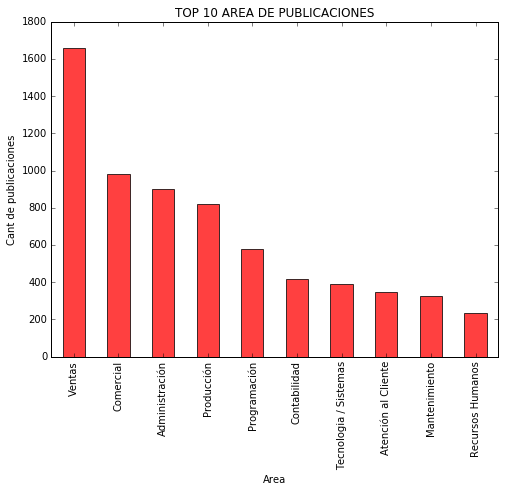

In [90]:
f = plt.figure()

plt.title ('TOP 10 AREA DE PUBLICACIONES',color='black')

ax = top10_publication_area.plot(kind='bar', stacked=True, figsize=(8,6) ,alpha=0.75, ax=f.gca(), color='red')


ax.set_ylabel('Cant de publicaciones')
ax.set_xlabel("Area")
plt.show()

ANALISIS DEL NIVEL EDUCATIVO DE LOS POSTULANTES

In [6]:
#data_postulant_education['nombre'].isnull().value_counts()

postulant_education = education_cleaning(data_postulant_education)
postulant_education = postulant_education['nombre'].value_counts()
postulant_education

Universitario        87838
Secundario           62411
Terciario/Técnico    27429
Posgrado              6050
Master                3475
Otro                  1338
Doctorado              211
Name: nombre, dtype: int64

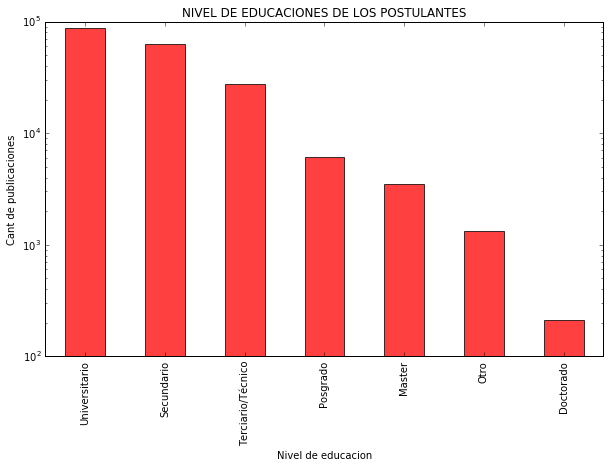

In [7]:
f = plt.figure()

plt.title ('NIVEL DE EDUCACIONES DE LOS POSTULANTES',color='black')

ax = postulant_education.plot(kind='bar', stacked=True, figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='red', logy= True )


ax.set_ylabel('Cant de publicaciones')
ax.set_xlabel("Nivel de educacion")
plt.show()

ANALISIS LA EDAD DE LOS POSTULANTES

In [78]:
data_postulant_sex_age["fechanacimiento"].isnull().value_counts()

False    196138
True       4750
Name: fechanacimiento, dtype: int64

In [79]:
#dates_without_nulls = data_postulant_sex_age["fechanacimiento"].dropna(how = "any")
data_postulant_sex_age["fechanacimiento"] = datetime(data_postulant_sex_age["fechanacimiento"],'%Y-%m-%d')
data_postulant_sex_age["fechanacimiento"] = data_postulant_sex_age["fechanacimiento"].dropna()

In [80]:
#dates_without_nulls  = dates_without_nulls.map(lambda x:str(x))
#dates_without_nulls  = dates_without_nulls.map(lambda x: int(x[0:4]))
#dates_without_nulls = dates_without_nulls[(dates_without_nulls > 1948) & (dates_without_nulls < 2000)]

ages = data_postulant_sex_age[(data_postulant_sex_age["fechanacimiento"].dt.year>1948) & (data_postulant_sex_age["fechanacimiento"].dt.year<2000)]

years = ages["fechanacimiento"].map(lambda x: x.year)



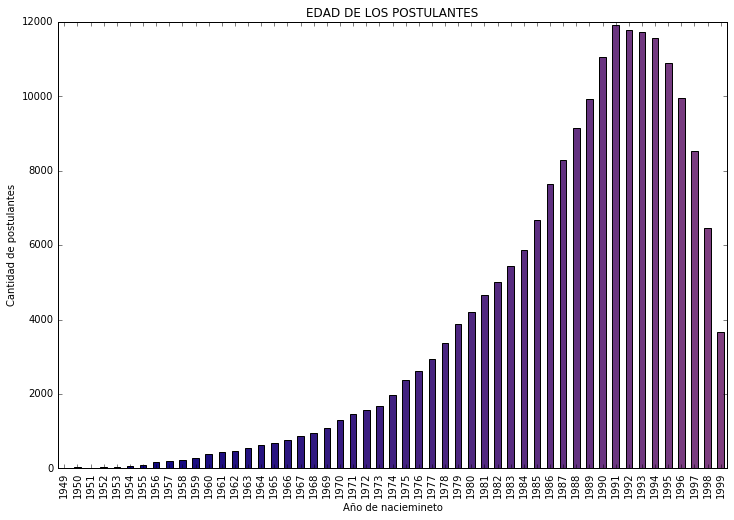

In [81]:
dates = years.value_counts().sort_index()


my_colors = [(x/100.0, x/200.0, 0.5) for x in range(len(dates))]


plt.title ('EDAD DE LOS POSTULANTES',color='black')

ax = dates.plot(kind='bar',rot=90,figsize=(12,8),color=my_colors )


ax.set_ylabel('Cantidad de postulantes')
ax.set_xlabel("Año de naciemineto")
plt.show()

In [ ]:
ANALISIS DE CUAL ES EL AREA CON MAS POSTULACIONES

In [82]:
id_ads = data_postulation["idaviso"]
id_counts = id_ads.value_counts()
id_counts_frame = id_counts.to_frame()
id_counts_frame = id_counts_frame.reset_index()
id_counts_frame.rename(columns={'idaviso':'count', 'index':'idaviso'}, inplace = True)
result = pd.merge(id_counts_frame, data_ads_details, how='left', on="idaviso")
result_postulation_area = result.groupby(["nombre_area"],sort =True)["count"].sum()





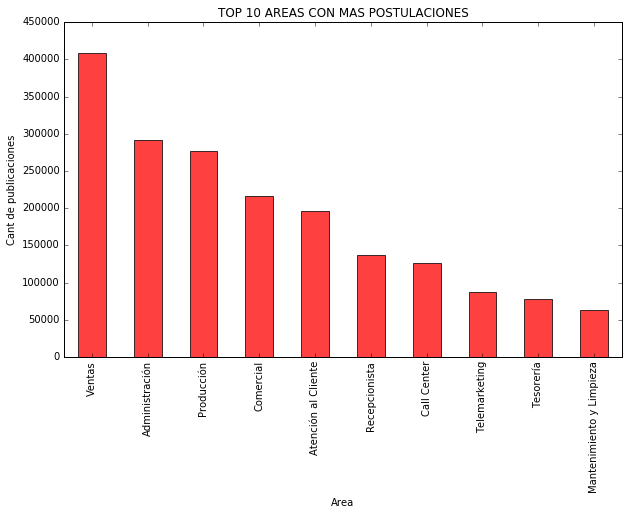

In [83]:
f = plt.figure()

plt.title ('TOP 10 AREAS CON MAS POSTULACIONES',color='black')

result_postulation_area_top_10 = result_postulation_area.sort_values()[-10:]

ax = result_postulation_area_top_10[::-1].plot(kind='bar', stacked=True, figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='red' )


ax.set_ylabel('Cant de publicaciones')
ax.set_xlabel("Area")
plt.show()


## Analisis de la Cantidad de Aviso por tipo de trabajo

In [40]:
#check if there are any nulls
data_ads_details['tipo_de_trabajo'].isnull().value_counts()

False    13534
Name: tipo_de_trabajo, dtype: int64

In [31]:
type_ads = data_ads_details.groupby('tipo_de_trabajo')['idaviso'].count().sort_values()

In [32]:
type_ads = data_ads_details['tipo_de_trabajo'].value_counts()

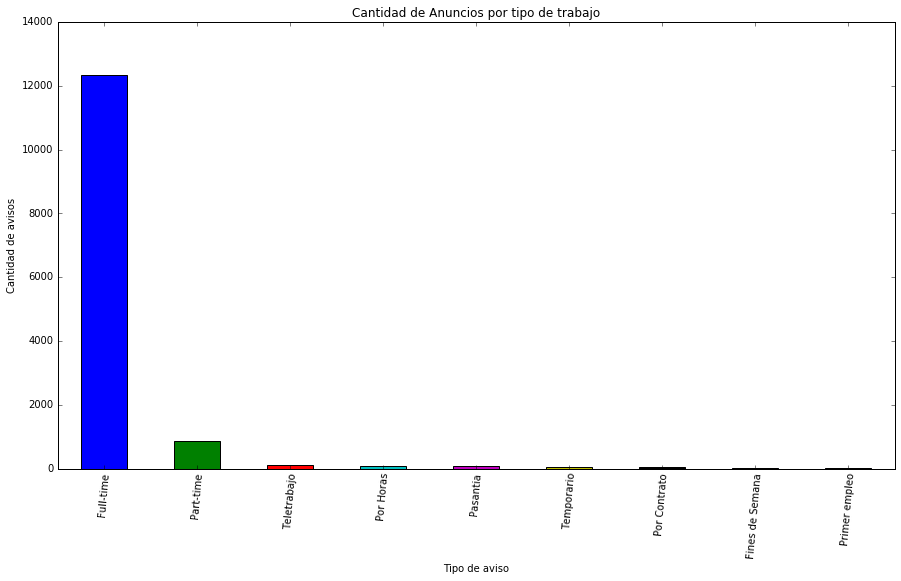

In [36]:
type_ads.plot(kind='bar',figsize=(15,8),rot=85,title='Cantidad de Avisos por tipo de trabajo');
ax=plt.gca()
ax.set_ylabel('Cantidad de avisos')
ax.set_xlabel('Tipo de aviso')
plt.show()

Como podemos ver hay una gran diferencia entre la cantidad de avisos que hay para trabajos *Full-Time* contra el resto de tipo de trabajos. Como no se aprecia mucho la diferencia entre los que tienen poca cantidad de anuncios, vamos a hacer otra visualizacion con escala logaritmica.

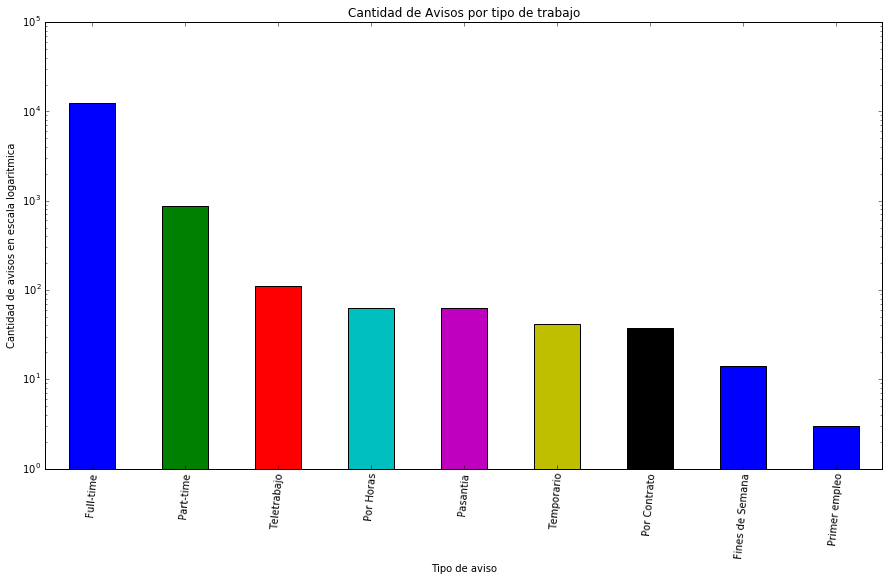

In [37]:
type_ads.plot(kind='bar',figsize=(15,8),rot=85,logy = True,title='Cantidad de Avisos por tipo de trabajo');
ax=plt.gca()
ax.set_ylabel('Cantidad de avisos en escala logaritmica')
ax.set_xlabel('Tipo de aviso')
plt.show()

## Analisis de la hora en que mas postulaciones se producen a lo largo del dia

In [46]:
#check if there are any nulls
data_postulation['fechapostulacion'].isnull().value_counts()

False    3401623
Name: fechapostulacion, dtype: int64

In [14]:
#agrego una columna que indica la hora del dia en que se postularon, no considero minutos ni segundos
data_postulation['fechapostulacion'] = datetime(data_postulation['fechapostulacion'],'%Y-%m-%d %H:%M')
data_postulation['Hora'] = data_postulation['fechapostulacion'].dt.hour
data_postulation.head()

,idaviso,idpostulante,fechapostulacion,Hora
0,1112257047,NM5M,2018-01-15 16:22:34,16
1,1111920714,NM5M,2018-02-06 09:04:50,9
2,1112346945,NM5M,2018-02-22 09:04:47,9
3,1112345547,NM5M,2018-02-22 09:04:59,9
4,1112237522,5awk,2018-01-25 18:55:03,18


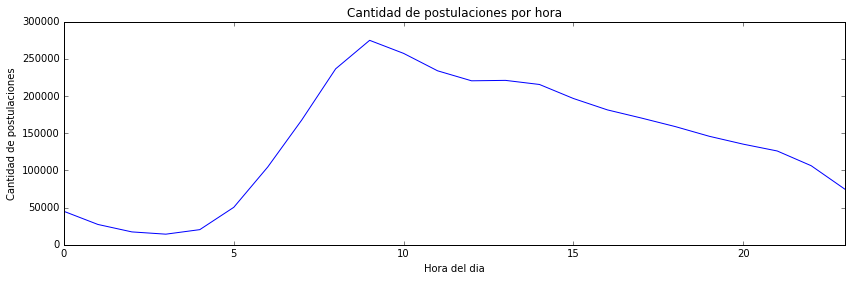

In [15]:
data_postulation.groupby('Hora').count()['idpostulante'].plot(figsize=(14,4),title='Cantidad de postulaciones por hora');
ax=plt.gca()
ax.set_ylabel('Cantidad de postulaciones')
ax.set_xlabel('Hora del dia')
plt.show()


In [92]:
#check if there are any nulls
data_ads_details['ciudad'].isnull().value_counts()

True     13487
False       47
Name: ciudad, dtype: int64

No sirve para nada esta columna con la poca informacion que contiene

In [93]:
#check if there are any nulls
data_ads_details['mapacalle'].isnull().value_counts()

True     12662
False      872
Name: mapacalle, dtype: int64

No sirve para nada esta columna con la poca informacion que contiene

## Analisis de proporcion de postulantes por su sexo.

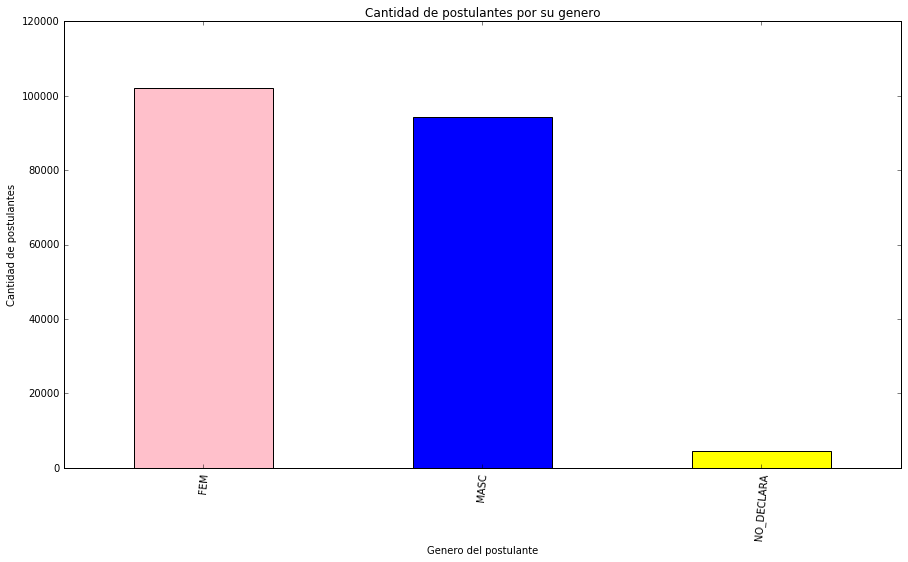

In [8]:
data_postulant_sex_age.groupby('sexo').count()['idpostulante'].plot(kind = 'bar', figsize=(15,8),title='Cantidad de postulantes por su genero',color = ['pink','blue','yellow'],rot=85);
#plt.legend(labels=['FEM','MASC','NO_DECLARA'])
ax=plt.gca()
ax.set_ylabel('Cantidad de postulantes')
ax.set_xlabel('Genero del postulante')
plt.show()
plt.show()

# Analisis de las empresas.

## Analisis de las 10 empresas con mas avisos online.

In [28]:
data_ads_details['denominacion_empresa'] = data_ads_details['denominacion_empresa'].dropna()
data_ads_details = data_ads_details.drop(data_ads_details[data_ads_details['denominacion_empresa'] == '-'].index)

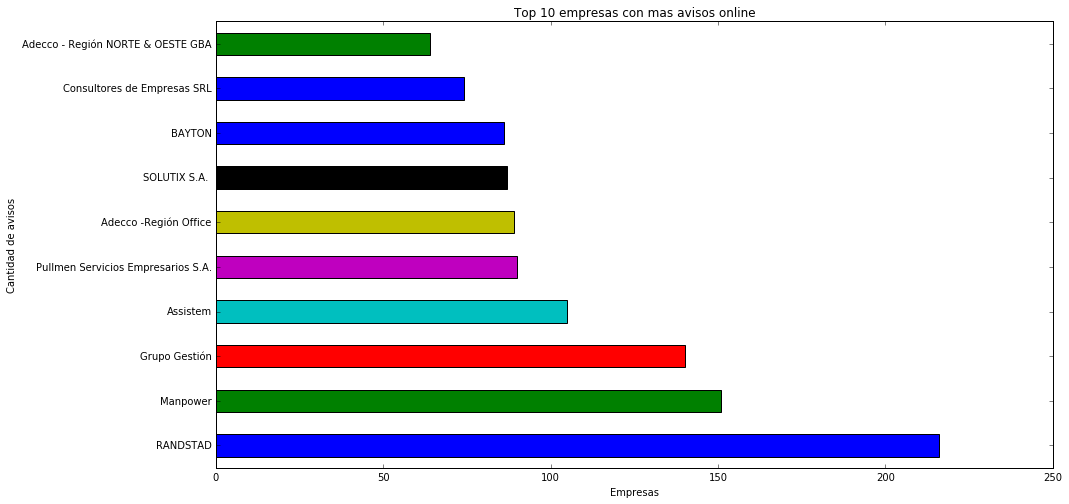

In [48]:
df_companies = data_ads_details[['idaviso','denominacion_empresa']]
df_companies_online = pd.merge(df_companies,data_ads_online, on ='idaviso')
df_companies_online = df_companies_online['denominacion_empresa'].value_counts().nlargest(10)

df_companies_online.plot(kind='barh',figsize=(15,8),rot=0,title='Top 10 empresas con mas avisos online');
ax=plt.gca()
ax.set_ylabel('Cantidad de avisos')
ax.set_xlabel('Empresas')
plt.show()

# Analisis de empresas con más postulaciones